## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_study_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Checking the number of mice.
combined_study_df['Mouse ID'].nunique()

249

In [5]:
######NOT CONFIDENT IN CODING HERE#####
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. .groupby('')
mouse_df = combined_study_df.groupby(['Mouse ID'])
mouse_df['Timepoint'].nunique()


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = combined_study_df[combined_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dup_mouse_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,10.0,10.0,10.00000,10.000000,10.000000
mean,21.0,26.0,10.00000,50.273452,0.300000
std,0.0,0.0,7.45356,3.702155,0.483046
min,21.0,26.0,0.00000,45.000000,0.000000
25%,21.0,26.0,5.00000,47.874494,0.000000
50%,21.0,26.0,10.00000,50.603190,0.000000
75%,21.0,26.0,15.00000,53.017804,0.750000
max,21.0,26.0,20.00000,55.326122,1.000000


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_df = combined_study_df.drop_duplicates(subset =["Mouse ID", 'Timepoint'], keep ='first', inplace =False)
unique_mouse_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_df['Mouse ID'].nunique()


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_vol_df = unique_mouse_df.groupby(["Drug Regimen"])

tumor_mean = tumor_vol_df["Tumor Volume (mm3)"].mean()
tumor_median = tumor_vol_df["Tumor Volume (mm3)"].median()
tumor_var = tumor_vol_df["Tumor Volume (mm3)"].var()
tumor_stdev = tumor_vol_df["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_vol_df["Tumor Volume (mm3)"].sem()

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_Vol_Analysis = pd.DataFrame({
    "Tumor Mean":tumor_mean,
    "Tumor Median":tumor_median,
    "Tumor Variance":tumor_var,
    "Tumor StdDev":tumor_stdev,
    "Tumor SEM":tumor_SEM})

Tumor_Vol_Analysis["Tumor Mean"]=Tumor_Vol_Analysis["Tumor Mean"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor Median"]=Tumor_Vol_Analysis["Tumor Median"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor Variance"]=Tumor_Vol_Analysis["Tumor Variance"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor StdDev"]=Tumor_Vol_Analysis["Tumor StdDev"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor SEM"]=Tumor_Vol_Analysis["Tumor SEM"].map("{:,.2f}".format)
Tumor_Vol_Analysis.head()



,Tumor Mean,Tumor Median,Tumor Variance,Tumor StdDev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [ ]:
#####WHAT IS THE AGGREGATION METHOD AND HOW DO I TRANSLATE FROM THE ABOVE#########
# Using the aggregation method, produce the same summary statistics in a single line
aggregated = Tumor_Vol_Analysis.agg({'Tumor Mean':'mean', 'Tumor Median': 'mean', 
                                     'Tumor Variance':'mean', 'Tumor StdDev':'mean',
                                     'Tumor SEM':'mean'})
print(aggregated)


                                               


## Bar and Pie Charts

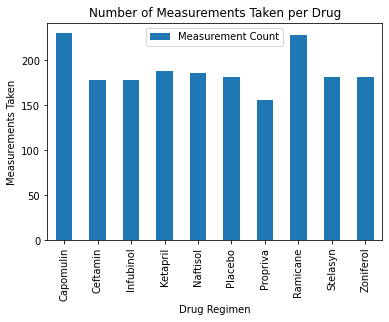

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = unique_mouse_df.groupby(["Drug Regimen"])
count_measurements = measurements_df['Weight (g)'].count()

drug_and_measurement_df = pd.DataFrame({
    "Measurement Count":count_measurements})

drug_and_measurement_df.head()

#Create bar chart
drug_and_measurement_df.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.legend(loc="best")

plt.show()
plt.tight_layout()


In [ ]:
drug_and_measurement_df

In [ ]:
tick_locations

In [ ]:
################FIGURE OUT WHY TICKS LOCATION IS NOT WORKING#####################

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_and_measurement_df))
labels = drug_and_measurement_df["Drug Regimen"]

tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_and_measurement_df["Measurement Count"], color='r', alpha=0.5, align="center")

plt.xticks(tick_locations, labels, rotation=90 )
#plt.xticks(tick_locations, [["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                             #"Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]], rotation="vertical")

plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")

plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Gender Distribution')

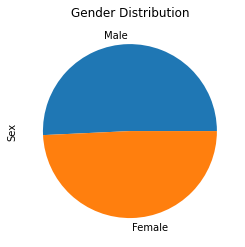

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = unique_mouse_df["Sex"].value_counts()
gender_count
        
gender_count.plot(kind="pie")
plt.title("Gender Distribution")

<ipython-input-14-e74776abbe4c>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)


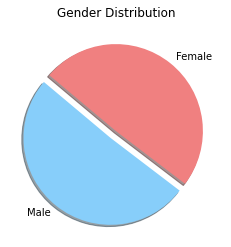

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [gender_count]
colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)

plt.title("Gender Distribution")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = unique_mouse_df.groupby(["Mouse ID"]).max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Combined_Time_df = timepoint_df[["Mouse ID", "Timepoint"]].merge(unique_mouse_df, on=["Mouse ID", "Timepoint"],how="left")
Combined_Time_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_timemax_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    drug_impact = Combined_Time_df[Combined_Time_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    iqr = drug_impact.quantile(.75) - drug_impact.quantile(.25)
    lower_bound = drug_impact.quantile(.25) - (1.5*iqr)
    upper_bound = drug_impact.quantile(.75) + (1.5*iqr)
    
    # add subset
    tumor_timemax_vol.append(drug_impact)
    
    #Determine outliers using upper and lower bounds
    print(f'{treatment} are potential outliers: {drug_impact[(drug_impact<lower_bound)|(drug_impact>upper_bound)]}')
    

Capomulin are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol are potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


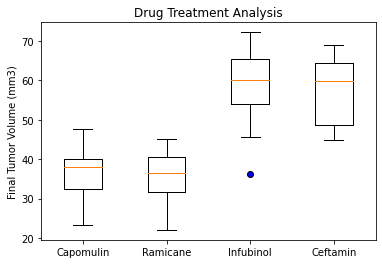

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_timemax_vol, labels=treatments, flierprops={"markerfacecolor":"blue"})
plt.title('Drug Treatment Analysis')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = unique_mouse_df.groupby["Mouse ID", "Drug Regimen"]

capomulin

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.plot(year,vc_fit,"--")
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')
# plt.show()

TypeError: 'method' object is not subscriptable

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
